In [1]:
import numpy as np
import pandas as pd

In [2]:
PREPARED_DATASET_PATH = 'data/train_prepared.csv'

In [3]:
df_train = pd.read_csv(PREPARED_DATASET_PATH)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9998 entries, 0 to 9997
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DistrictId          9998 non-null   int64  
 1   Rooms               9998 non-null   float64
 2   Square              9998 non-null   float64
 3   LifeSquare          9998 non-null   float64
 4   KitchenSquare       9998 non-null   float64
 5   Floor               9998 non-null   int64  
 6   HouseFloor          9998 non-null   float64
 7   HouseYear           9998 non-null   int64  
 8   Ecology_1           9998 non-null   float64
 9   Ecology_2           9998 non-null   int64  
 10  Ecology_3           9998 non-null   int64  
 11  Social_1            9998 non-null   int64  
 12  Social_2            9998 non-null   int64  
 13  Social_3            9998 non-null   int64  
 14  Helthcare_2         9998 non-null   int64  
 15  Shops_1             9998 non-null   int64  
 16  Shops_

### Докрутки

In [5]:
df_train['Square'] = np.log(df_train['Square'])

### Готовит датасеты

In [6]:

X = df_train.drop('Price', axis=1)
y = df_train['Price']

X.shape, y.shape

((9998, 18), (9998,))

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=100)

In [9]:
feature_names = X_train.columns
feature_names

Index(['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3',
       'Social_1', 'Social_2', 'Social_3', 'Helthcare_2', 'Shops_1', 'Shops_2',
       'Healthcare_1_notna'],
      dtype='object')

### Линейная регрессия. Стандартизованные параметры

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [11]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

X_valid_scaled = scaler.fit_transform(X_valid)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=feature_names)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
y_pred = lr.predict(X_valid_scaled)

y_pred.shape

(2500,)

In [16]:
y_pred.shape, y_valid.shape

((2500,), (2500,))

In [17]:
check_test = pd.DataFrame({
    "y_test": y_valid,
    "y_pred": y_pred.flatten(),
})

check_test.head(10)

,y_test,y_pred
8799,256829.514269,290645.519130
9343,160744.786761,152922.881209
3854,141729.122695,147104.789344
2029,138458.871107,178494.550770
3539,167365.717231,197979.378140
1942,162752.333389,149172.231238
1250,255449.055490,298073.464452
2817,156234.787279,189525.548648
4210,195850.336004,174116.749686
477,325600.765809,190903.718946


In [18]:
r2_score(y_valid, y_pred)

0.5141797713977305

In [19]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = 6, 4

%matplotlib inline

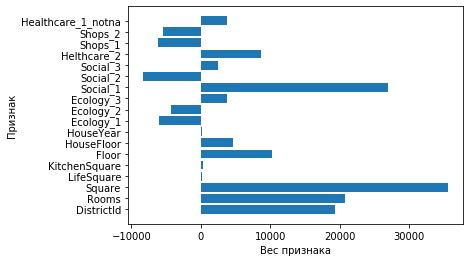

In [20]:
plt.barh(X_train.columns, lr.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

### Причесываем признаки

In [21]:
import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
plt.style.use('seaborn-ticks')
#plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (6, 4)
matplotlib.rcParams.update({'font.size': 14})

sns.style = "seaborn-ticks"

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [23]:
X.shape

(9998, 18)

In [24]:
feature_names

Index(['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3',
       'Social_1', 'Social_2', 'Social_3', 'Helthcare_2', 'Shops_1', 'Shops_2',
       'Healthcare_1_notna'],
      dtype='object')

In [25]:
feature_names_corr = ['Social_1', 'Square', 'Rooms', 'DistrictId', 'Price']

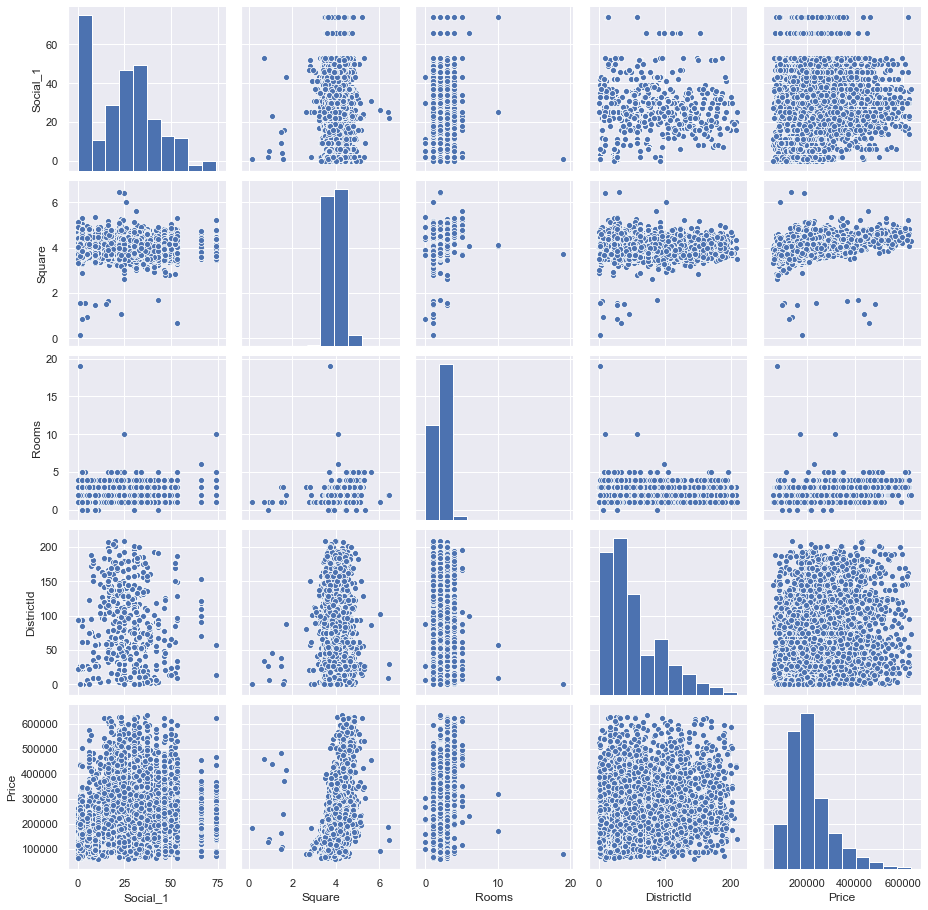

In [26]:
sns.set()
sns.pairplot(df_train[feature_names_corr]);

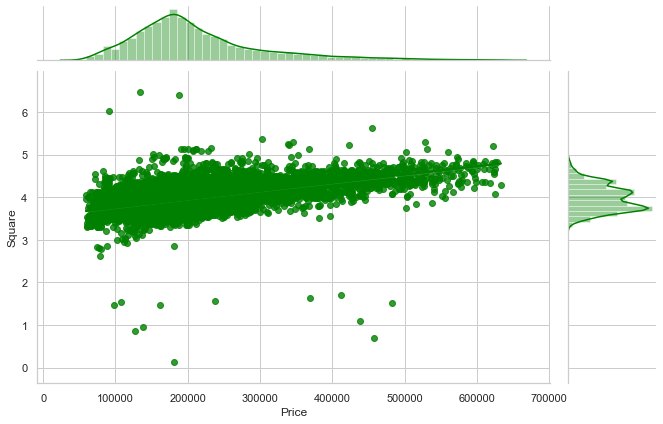

In [593]:
with sns.axes_style(style='whitegrid'):
    grid = sns.jointplot(df_train['Price'], df_train['Square'], kind='reg', color='green')
grid.fig.set_figwidth(10)
grid.fig.set_figheight(6)